### load kaggle dataset

In [ ]:
!pip install kaggle --upgrade

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kkyung0131","key":"e2b160f8872fe8f280cdf6b35e990a18"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -1ha kaggle.json

kaggle.json


## [캐글 필사 과제] Pytorch Drop Out, Batch Normalize Snippet


🔗[링크](https://www.kaggle.com/code/spacehedgehog/pytorch-drop-out-batch-normalize-snippet)



In [ ]:
!kaggle competitions download -c titanic
!unzip titanic.zip

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./gender_submission.csv")
print(train.shape, test.shape)

(891, 12) (418, 11)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.classifier = nn.Sequential(
        nn.Linear(5,128),    # Z1 = X[99,5] @ W[5,128] + b[99,128]
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.1),

        nn.Linear(128,256),   # Z2 = A1[99,128] @ W[128,256] + b[99,256]
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.1),

        nn.Linear(256,128),   # Z3 = A2[99,256] @ W[256,128] + b[99,128]
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(128,1),
        nn.Sigmoid()
    )

  def forward(self, x):
    x = x.view(x.size(0), -1)  # [99,5]
    x = self.classifier(x)
    return x

In [ ]:
data_set = pd.concat((train.drop(['Survived'], axis=1), test), axis=0)
data_set = data_set.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'], axis=1)
data_set = data_set.fillna(data_set.mean())

n_train = train.shape[0]
X_train, X_test = data_set[:n_train], data_set[n_train:]
y_train = train['Survived']

X_train = X_train[X_train.keys()].values
X_test = X_test[X_test.keys()].values
y_train = y_train.values

In [ ]:
import torch.optim as optim
from torch.autograd import Variable

model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.01)
error = nn.BCELoss()

batch_size = 99
batch_count = int(len(X_train)/batch_size)  # 9

for epoch in range(300):
  train_loss = 0
  num_right = 0
  for i in range(batch_count):
    start = i * batch_size
    end = start + batch_size
    x_tensor = torch.FloatTensor(X_train[start:end])
    y_tensor = torch.FloatTensor(y_train[start:end]).reshape(-1,1)

    optimizer.zero_grad()
    output = model(x_tensor)
    loss = error(output, y_tensor)
    loss.backward()
    optimizer.step()

    train_loss += loss.item() * batch_size
    result = [1 if out >= 0.5 else 0 for out in output]
    num_right += np.sum(np.array(result) == y_train[start:end])

  train_loss = train_loss / len(X_train)
  accuracy = num_right / len(X_train)

  if epoch % 25 == 0:
    print('Loss:{} Accuracy: {}% Epoch: {}'.format(train_loss, accuracy, epoch))

print('Training Ended')

Loss:0.6372339460584853 Accuracy: 0.6397306397306397% Epoch: 0
Loss:0.5269140534930759 Accuracy: 0.7530864197530864% Epoch: 25
Loss:0.47498910625775653 Accuracy: 0.7822671156004489% Epoch: 50
Loss:0.41739507847362095 Accuracy: 0.8080808080808081% Epoch: 75
Loss:0.39734650982750785 Accuracy: 0.8327721661054994% Epoch: 100
Loss:0.3550518817371792 Accuracy: 0.8518518518518519% Epoch: 125
Loss:0.2894352260563109 Accuracy: 0.8754208754208754% Epoch: 150
Loss:0.28268441723452675 Accuracy: 0.8810325476992144% Epoch: 175
Loss:0.2850629952218797 Accuracy: 0.8911335578002245% Epoch: 200
Loss:0.23012584944566092 Accuracy: 0.9046015712682379% Epoch: 225
Loss:0.23489000565475887 Accuracy: 0.9057239057239057% Epoch: 250
Loss:0.23776786857181126 Accuracy: 0.8945005611672279% Epoch: 275
Training Ended


In [ ]:
tensor_test_x = torch.FloatTensor(X_test)
with torch.no_grad():
  test_output = model(tensor_test_x)
  result = np.array([1 if out >= 0.5 else 0 for out in test_output])
  submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':result})
  submission.to_csv("submission.csv", index=False)

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## [깃허브 필사 과제] Batch Normalization

🔗[링크](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/batch-norm/Batch_Normalization.ipynb)

In [ ]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

num_workers = 0
batch_size = 64
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17724012.01it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 483517.72it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2647557.48it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3509030.90it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



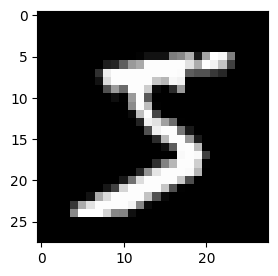

In [ ]:
# visualization
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

img = np.squeeze(images[0])
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NN(nn.Module):
  def __init__(self, use_batch_norm, input_size=784, hidden_dim=256, output_size=10):
    super(NN, self).__init__()
    self.input_size = input_size  # 28*28
    self.hidden_dim = hidden_dim
    self.output_size = output_size  # number of classes
    self.use_batch_norm = use_batch_norm

    if use_batch_norm:
      self.fc1 = nn.Linear(input_size, hidden_dim*2, bias=False)
      self.batch_norm1 = nn.BatchNorm1d(hidden_dim*2)
    else:
      self.fc1 = nn.Linear(input_size, hidden_dim*2)

    if use_batch_norm:
      self.fc2 = nn.Linear(hidden_dim*2, hidden_dim, bias=False)
      self.batch_norm2 = nn.BatchNorm1d(hidden_dim)
    else:
      self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)

    self.fc3 = nn.Linear(hidden_dim, output_size)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    if self.use_batch_norm:
      x = self.batch_norm1(x)
    x = F.relu(x)
    x = self.fc2(x)
    if self.use_batch_norm:
      x = self.batch_norm2(x)
    x = F.relu(x)
    x = self.fc3(x)
    return x

In [ ]:
# NN with batch normalization
net_batchnorm = NN(use_batch_norm=True)

# NN without batch normalization
net_no_norm = NN(use_batch_norm=False)

print(net_batchnorm,"\n")
print(net_no_norm)

NN(
  (fc1): Linear(in_features=784, out_features=512, bias=False)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=False)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
) 

NN(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
# training
def train(model, n_epochs=10):
  n_epochs = n_epochs
  losses = []
  criterion = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
  model.train()

  for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    batch_count = 0
    for batch_idx, (data, target) in enumerate(train_loader):
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
      batch_count += 1

    losses.append(train_loss/batch_count)
    print('Epoch: {} \tTraning Loss: {:.6f}'.format(epoch, train_loss/batch_count))

  return losses

Epoch: 1 	Traning Loss: 0.392971
Epoch: 2 	Traning Loss: 0.166743
Epoch: 3 	Traning Loss: 0.115884
Epoch: 4 	Traning Loss: 0.086162
Epoch: 5 	Traning Loss: 0.065941
Epoch: 6 	Traning Loss: 0.051143
Epoch: 7 	Traning Loss: 0.040006
Epoch: 8 	Traning Loss: 0.031440
Epoch: 9 	Traning Loss: 0.024885
Epoch: 10 	Traning Loss: 0.019920
Epoch: 1 	Traning Loss: 1.624921
Epoch: 2 	Traning Loss: 0.514693
Epoch: 3 	Traning Loss: 0.375179
Epoch: 4 	Traning Loss: 0.328468
Epoch: 5 	Traning Loss: 0.300145
Epoch: 6 	Traning Loss: 0.278282
Epoch: 7 	Traning Loss: 0.259578
Epoch: 8 	Traning Loss: 0.242840
Epoch: 9 	Traning Loss: 0.227599
Epoch: 10 	Traning Loss: 0.213651


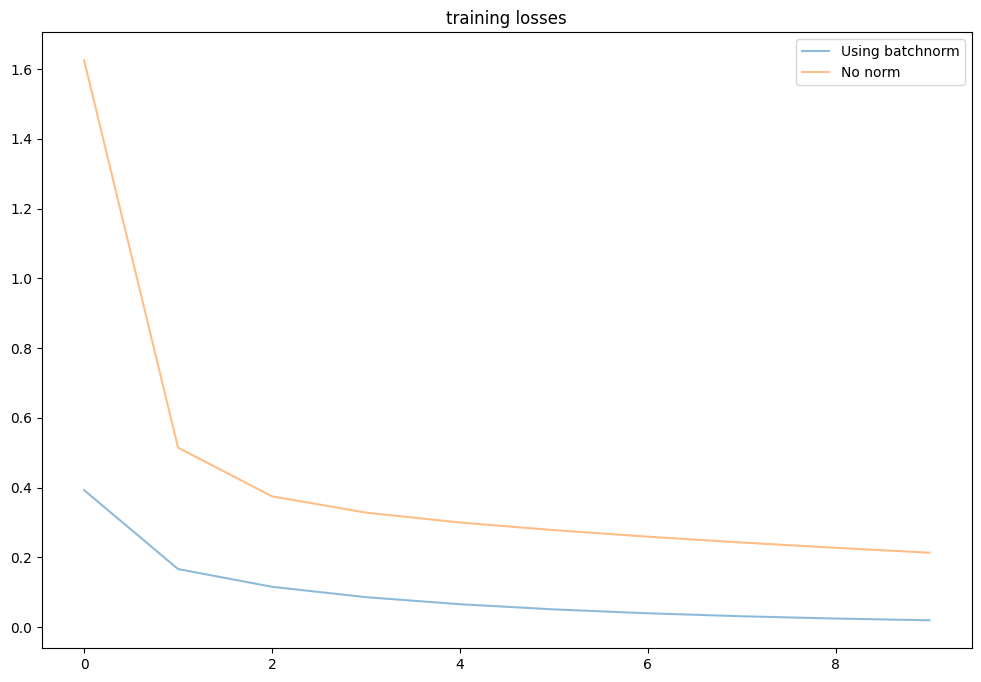

In [ ]:
# comparing models
losses_batchnorm = train(net_batchnorm)
losses_no_norm = train(net_no_norm)

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(losses_batchnorm, label='Using batchnorm', alpha=0.5)
plt.plot(losses_no_norm, label='No norm', alpha=0.5)
plt.title("training losses")
plt.legend()

In [ ]:
# testing
def test(model, train):
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))
  test_loss = 0.0

  if (train==True):
    model.train()
  if (train==False):
    model.eval()

  criterion = nn.CrossEntropyLoss()

  for batch_idx, (data, target) in enumerate(test_loader):
    batch_size = data.size(0)
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item() * batch_size
    _, pred = torch.max(output, 1)

    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
      label = target.data[i]
      class_correct[label] += correct[i].item()
      class_total[label] += 1

  print("Test Loss: {:.6f}\n".format(test_loss/len(test_loader.dataset)))

  for i in range(10):
    if class_total[i] > 0:
      print("Test Accuracy of %5s: %2d%% (%2d/%2d)" % (
          str(i), 100*class_correct[i]/class_total[i],
          np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
      print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

  print("\nTest Accuracy (Overall): %2d%% (%2d/%2d)" % (
      100 * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

In [ ]:
# training and evaluation mode
test(net_batchnorm, train=True)
test(net_batchnorm, train=False)
test(net_no_norm, train=False)

Test Loss: 0.083183

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 97% (1003/1032)
Test Accuracy of     3: 97% (985/1010)
Test Accuracy of     4: 96% (950/982)
Test Accuracy of     5: 97% (868/892)
Test Accuracy of     6: 97% (936/958)
Test Accuracy of     7: 96% (996/1028)
Test Accuracy of     8: 96% (942/974)
Test Accuracy of     9: 96% (970/1009)

Test Accuracy (Overall): 97% (9745/10000)
Test Loss: 0.071059

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1124/1135)
Test Accuracy of     2: 97% (1004/1032)
Test Accuracy of     3: 98% (992/1010)
Test Accuracy of     4: 97% (957/982)
Test Accuracy of     5: 97% (872/892)
Test Accuracy of     6: 98% (939/958)
Test Accuracy of     7: 96% (995/1028)
Test Accuracy of     8: 96% (939/974)
Test Accuracy of     9: 98% (989/1009)

Test Accuracy (Overall): 97% (9781/10000)
Test Loss: 0.205184

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 98% (1113/1135)